In [10]:
import gensim
from xploration_functions import *
import pandas as pd
import csv
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim import corpora

file = 'Data/2-1_cleaned_corpus_rapports.csv'
corpus = pd.read_csv(file, sep=";")
corpus_list = corpus['rapport'].tolist()
dictionary = corpora.Dictionary([doc.split() for doc in corpus_list])
corpus = [dictionary.doc2bow(doc.split()) for doc in corpus_list]


#Train your LDA model
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=4
)

In [11]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Convert your LDA model into a format that pyLDAvis can use
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)

# Visualize the topics
pyLDAvis.display(vis_data)

In [4]:
topic_distributions = []
for document in corpus:
    doc_topics = lda_model.get_document_topics(document)
    topic_dist = [0] * lda_model.num_topics
    for topic in doc_topics:
        topic_dist[topic[0]] = topic[1]
    topic_distributions.append(topic_dist)

In [5]:
from sklearn.cluster import KMeans

# Cluster the topic distributions using K-means
kmeans = KMeans(n_clusters=5, random_state=0).fit(topic_distributions)

# Get the cluster assignments for each document in the corpus
cluster_assignments = kmeans.labels_

/home/gaultierjs/Desktop/Polytechnique/Thesis/Thesis/SogLab_venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


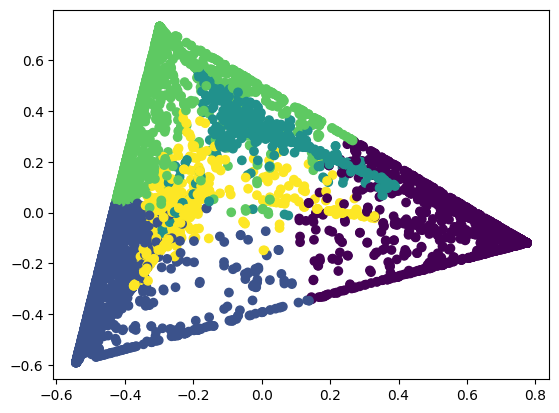

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to the topic distributions to reduce the dimensionality
pca = PCA(n_components=2)
topic_distributions_2d = pca.fit_transform(topic_distributions)

# Plot the clusters
plt.scatter(topic_distributions_2d[:, 0], topic_distributions_2d[:, 1], c=cluster_assignments)
plt.show()

In [7]:
from sklearn.cluster import KMeans

wss_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(topic_distributions)
    wss_values.append(kmeans.inertia_)

/home/gaultierjs/Desktop/Polytechnique/Thesis/Thesis/SogLab_venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/gaultierjs/Desktop/Polytechnique/Thesis/Thesis/SogLab_venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/gaultierjs/Desktop/Polytechnique/Thesis/Thesis/SogLab_venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/gaultierjs/Desktop/Polytechnique/Thesis/Thesis/SogLab_venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: Th

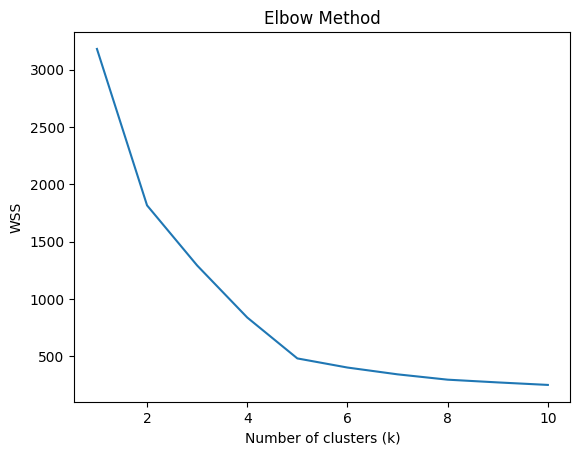

In [8]:
import matplotlib.pyplot as plt

# Plot the WSS values as a function of k
plt.plot(range(1, 11), wss_values)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WSS')
plt.show()

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
corpus = [doc for doc in corpus_list]
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()
tfidf_matrix = X.toarray()


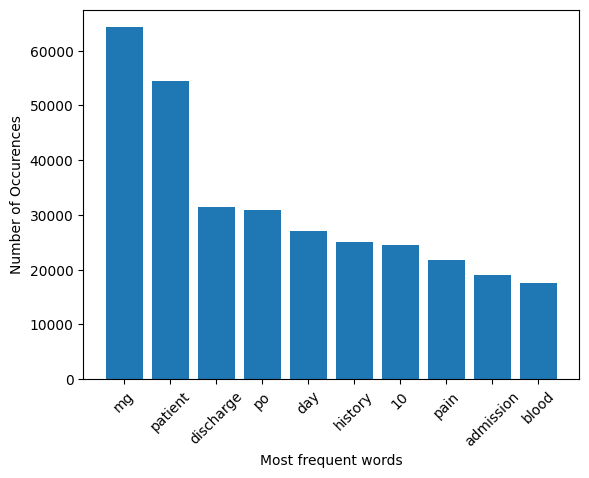

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Define a corpus of documents
corpus = [doc for doc in corpus_list]
# Create a CountVectorizer instance and fit the corpus
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(corpus)

# Get the list of feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Compute the sum of each word in the bag-of-words matrix
word_frequencies = bow_matrix.sum(axis=0)

# Convert the word frequencies to a list and sort by frequency
word_frequencies = [(word, word_frequencies[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
word_frequencies = sorted(word_frequencies, key=lambda x: x[1], reverse=True)

# Plot the 10 most frequent words
top_words = word_frequencies[:10]
plt.bar([x[0] for x in top_words], [x[1] for x in top_words])
plt.xticks(rotation=45)
plt.xlabel('Most frequent words')
plt.ylabel('Number of Occurences')
plt.show()

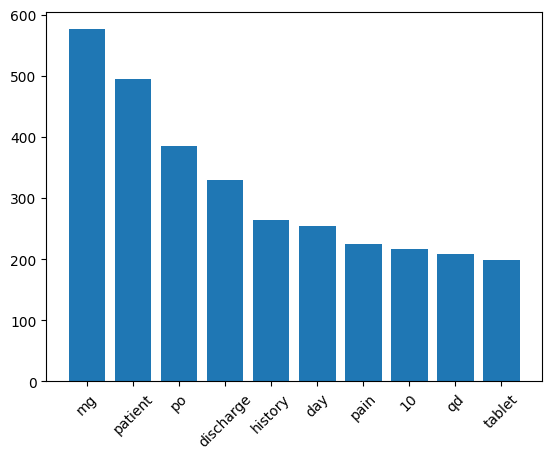

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Define a corpus of documents

# Create a TfidfVectorizer instance and fit the corpus
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)

# Get the list of feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Compute the TF-IDF scores for each word in the corpus
word_scores = tfidf_matrix.sum(axis=0)

# Convert the word scores to a list and sort by score
word_scores = [(word, word_scores[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
word_scores = sorted(word_scores, key=lambda x: x[1], reverse=True)

# Plot the 10 most important words
top_words = word_scores[:10]
plt.bar([x[0] for x in top_words], [x[1] for x in top_words])
plt.xticks(rotation=45)
plt.xlabel('Most Important Words')
plt.show()


In [11]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Define a corpus of documents

# Split the corpus into sentences (lists of words)
sentences = [doc.split() for doc in corpus]

# Create a Word2Vec model and train it on the corpus
model = Word2Vec(sentences, min_count=1)

# Get the vocabulary of the model
vocab = list(model.wv.key_to_index)

# Use t-SNE to visualize the word vectors in 2D
tsne = TSNE(n_components=2, random_state=42)
vectors = model.wv[vocab]
vectors_tsne = tsne.fit_transform(vectors)

# Plot the word vectors in 2D
plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for word, pos in zip(vocab, vectors_tsne):
    plt.annotate(word, pos)
plt.show()


KeyboardInterrupt: 

In [4]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Define a corpus of documents

# Split the corpus into sentences (lists of words)
sentences = [doc.split() for doc in corpus]

# Create a Word2Vec model and train it on the corpus
model = Word2Vec(sentences, min_count=1)

# Get the vocabulary of the model
vocab = list(model.wv.index_to_key)

# Use t-SNE to visualize the word vectors in 2D
tsne = TSNE(n_components=2, random_state=42)
vectors = model.wv[vocab]
vectors_tsne = tsne.fit_transform(vectors)

# Plot the word vectors in 2D
plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for word, pos in zip(vocab, vectors_tsne):
    plt.annotate(word, pos)
plt.show()


ValueError: perplexity must be less than n_samples